**Movie Recommendation System using TF-IDF**


Loading Our Data with the help of Kaggle API key

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [2]:
!kaggle datasets download -d hijest/genre-classification-dataset-imdb

 41% 17.0M/41.7M [00:00<00:00, 69.8MB/s]
100% 41.7M/41.7M [00:00<00:00, 125MB/s] 


**Extracting the zip file**

In [3]:
import zipfile
zip=zipfile.ZipFile("/content/genre-classification-dataset-imdb.zip","r")
zip.extractall('/content')
zip.close()

In [341]:
import numpy as np
import pandas as pd

**Data Exploration(EDA) and Pre-processing**

In [342]:
train_data = pd.read_csv("/content/Genre Classification Dataset/train_data.txt", delimiter=':::' ,header = None ,engine='python')
test_data  = pd.read_csv("/content/Genre Classification Dataset/test_data.txt", delimiter=':::' ,header = None ,engine='python')

In [343]:
#Concatenating the train and test file
data=pd.concat([train_data,test_data])
data

,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",NaN
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,NaN
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,NaN
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",NaN


In [344]:
#Labelling the columns indexes
data.columns = ["id" ,"Title","Genre","Plot"]
data

,id,Title,Genre,Plot
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",NaN
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,NaN
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,NaN
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",NaN


In [345]:
#Dropping the unwanted columns to reduce memory overflow
data = data.drop(["id"] , axis = 1)
data

,Title,Genre,Plot
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54195,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",NaN
54196,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,NaN
54197,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,NaN
54198,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",NaN


In [346]:
data.shape

(108414, 3)

In [347]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108414 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Title   108414 non-null  object
 1   Genre   108414 non-null  object
 2   Plot    54214 non-null   object
dtypes: object(3)
memory usage: 3.3+ MB


In [348]:
#Checking any Null Values if present
data.isnull().sum()

Title        0
Genre        0
Plot     54200
dtype: int64

In [349]:
##Dropping any Null Values if present
data.dropna(inplace=True)

In [350]:
data.isnull().sum()

Title    0
Genre    0
Plot     0
dtype: int64

In [351]:
#Checking any Duplicated Values if present
data.duplicated().sum()

0

In [352]:
#Dropping any Duplicated Values if present
data=data.drop_duplicates(keep='first')

In [353]:
data.duplicated().sum()

0

In [354]:
data.Genre.unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [355]:
len(data.Genre.unique())

27

Plotting bar graph to visualize the data to identify the Genre counts

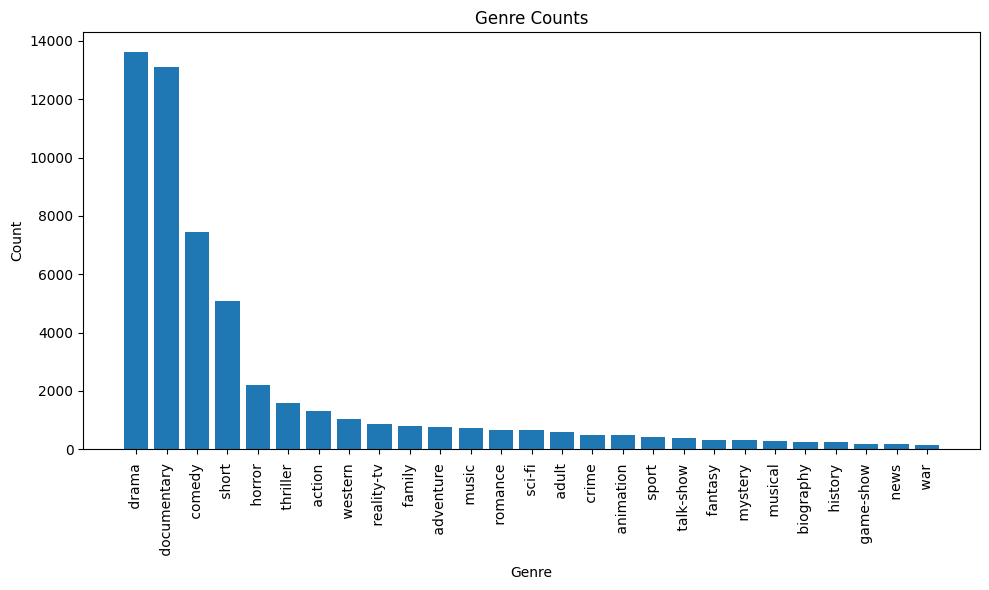

In [356]:
import matplotlib.pyplot as plt

# Create a figure with a larger size
plt.figure(figsize=(10, 6))

genre_counts = data['Genre'].value_counts()
plt.bar(genre_counts.index, genre_counts.values)

plt.xticks(rotation=90)

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Counts')

plt.tight_layout()
plt.show()


In [357]:
data.shape

(54214, 3)

**Data Cleaning**

In [358]:
import nltk
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [359]:
data.describe()

,Title,Genre,Plot
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [360]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [361]:
#To remove stopwords
from nltk.corpus import stopwords
import re

In [362]:
# function for text cleaning
def transform_text(text):
    # remove backslash-apostrophe
    text = re.sub("\'", "", text)
    # remove everything alphabets
    text = re.sub("[^a-zA-Z]"," ",text)
    # remove whitespaces
    text = ' '.join(text.split())
    # convert text to lowercase
    text = text.lower()

    stop_words = set(stopwords.words('english'))

    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

    return text

In [363]:
transform_text("How are you Aditi ?")

'aditi'

In [364]:
#Creating new column having a Cleaned Plot
data['transformed_Plot'] = data['Plot'].apply(transform_text)

In [365]:
data

,Title,Genre,Plot,transformed_Plot
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers un recovered bodies ground ...
...,...,...,...,...
54209,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,short lived nbc live sitcom centered bonino wo...
54210,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,next generation exploitation sisters kapa bay ...
54211,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",ze bestaan echt stand comedy growing facing fe...
54212,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,walter vivian live country difficult time keep...


In [366]:
#Encoding the Genre Labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['Genre'])

# transform target variable
y = le.transform(data['Genre'])

In [367]:
#Using TFID for Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.8, max_features=10000)

In [368]:
#Splitting dataset into training and validation set
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(data['transformed_Plot'], y, test_size=0.2, random_state=9)

In [369]:
#Creating TF-IDF features
xtrain_tfidf = tfidf.fit_transform(xtrain)
xval_tfidf = tfidf.transform(xval)

In [370]:
from sklearn.linear_model import LogisticRegression
# Performance metric
from sklearn.metrics import f1_score

In [371]:
lr = LogisticRegression()

In [372]:
#Fitting model on train data
lr.fit(xtrain_tfidf, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [373]:
#Making predictions for validation set
y_pred = lr.predict(xval_tfidf)

In [379]:
y_pred[8]

8

In [380]:
le.inverse_transform(y_pred)[8]

' drama '

In [381]:
#Evaluating performance
print(f1_score(yval, y_pred, average="micro"))

0.5909803559900396


**Create Inference Function**

Our job is still not over. We have trained our model and we have also made predictions for the validation set. However, we also have to take care of the new data or new movie plots that would come in future. Our movie genre prediction system should be able to take a movie plot in raw form as input and give out its genre tags as output.

To achieve this objective, let's build an inference function. It will take in a movie plot text and follow the steps below:

1.Clean the text
2.Remove stopwords from the cleaned text
3.Extract features from the text
4.Make predictions
5.Return the predicted movie genre tags

In [382]:
def infer_tags(q):
    q = transform_text(q)
    q_vec = tfidf.transform([q])
    q_pred = lr.predict(q_vec)
    return le.inverse_transform(q_pred)

**Testing our Model**

In [397]:
for i in range(5):
    k = xval.sample(1).index[0]
    print("Movie: ", data['Title'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",data['Genre'][k],"\n")

Movie:   "Sonic Cinema" (2000)  
Predicted genre:  [' music ']
Actual genre:   music  

Movie:   The Fever of the Western Nile (2003)  
Predicted genre:  [' short ']
Actual genre:   short  

Movie:   Shomur (????)  
Predicted genre:  [' drama ']
Actual genre:   drama  

Movie:   Persephone (2009)  
Predicted genre:  [' documentary ']
Actual genre:   short  

Movie:   "Hola! La" (2012)  
Predicted genre:  [' talk-show ']
Actual genre:   talk-show  

